# CAR COST PREDICTOR - Dataset: CarDekho

1. CN - Car Name
2. YRS - years used
3. SP/PP - Selling Price and Present Price
4. KMSD - kilometers driven
5. FT - Fuel Type
6. ST - Seller Type
7. TRM - transmission
8. MIL - mileage (km/l)
9. ENG - engine 
10. MAXP - Maximum Power (bhp)
11. OWN - owner
12. SEAT - no of seats
13. The above are the names of the features of the cardekho dataset

In [1]:
import pandas as pd
cardata = pd.read_csv("car data.csv")

In [2]:
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CN      301 non-null    object 
 1   YRS     301 non-null    int64  
 2   SP      301 non-null    float64
 3   PP      301 non-null    float64
 4   KMSD    301 non-null    int64  
 5   FT      301 non-null    object 
 6   ST      301 non-null    object 
 7   TRM     301 non-null    object 
 8   OWN     301 non-null    int64  
 9   MIL     301 non-null    float64
 10  ENG     301 non-null    float64
 11  MAXP    301 non-null    float64
 12  SEAT    301 non-null    int64  
 13  CY      301 non-null    int64  
dtypes: float64(5), int64(5), object(4)
memory usage: 33.0+ KB


In [3]:
cardata['NOYRS'] = cardata['CY'] - cardata['YRS']
cardata.head()

,CN,YRS,SP,PP,KMSD,FT,ST,TRM,OWN,MIL,ENG,MAXP,SEAT,CY,NOYRS
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,23.40,1248.0,74.00,5,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,21.14,1498.0,103.52,5,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,17.70,1497.0,78.00,5,2022,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,23.00,1396.0,90.00,5,2022,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,16.10,1298.0,88.20,5,2022,8


In [4]:
cardata["OWN"].value_counts()

0    290
1     10
3      1
Name: OWN, dtype: int64

In [5]:
cardata["SEAT"].value_counts()

5    250
7     38
4      5
8      5
6      2
9      1
Name: SEAT, dtype: int64

In [6]:
corr_matrix = cardata.corr()
corr_matrix['PP'].sort_values(ascending = False)

PP       1.000000
SP       0.878983
KMSD     0.203647
MIL      0.146328
NOYRS    0.047584
SEAT     0.018045
OWN      0.008057
YRS     -0.047584
ENG     -0.079883
MAXP    -0.138442
CY            NaN
Name: PP, dtype: float64

array([[<AxesSubplot:xlabel='PP', ylabel='PP'>,
        <AxesSubplot:xlabel='SP', ylabel='PP'>,
        <AxesSubplot:xlabel='KMSD', ylabel='PP'>,
        <AxesSubplot:xlabel='ENG', ylabel='PP'>,
        <AxesSubplot:xlabel='MAXP', ylabel='PP'>],
       [<AxesSubplot:xlabel='PP', ylabel='SP'>,
        <AxesSubplot:xlabel='SP', ylabel='SP'>,
        <AxesSubplot:xlabel='KMSD', ylabel='SP'>,
        <AxesSubplot:xlabel='ENG', ylabel='SP'>,
        <AxesSubplot:xlabel='MAXP', ylabel='SP'>],
       [<AxesSubplot:xlabel='PP', ylabel='KMSD'>,
        <AxesSubplot:xlabel='SP', ylabel='KMSD'>,
        <AxesSubplot:xlabel='KMSD', ylabel='KMSD'>,
        <AxesSubplot:xlabel='ENG', ylabel='KMSD'>,
        <AxesSubplot:xlabel='MAXP', ylabel='KMSD'>],
       [<AxesSubplot:xlabel='PP', ylabel='ENG'>,
        <AxesSubplot:xlabel='SP', ylabel='ENG'>,
        <AxesSubplot:xlabel='KMSD', ylabel='ENG'>,
        <AxesSubplot:xlabel='ENG', ylabel='ENG'>,
        <AxesSubplot:xlabel='MAXP', ylabel='ENG'>],
 

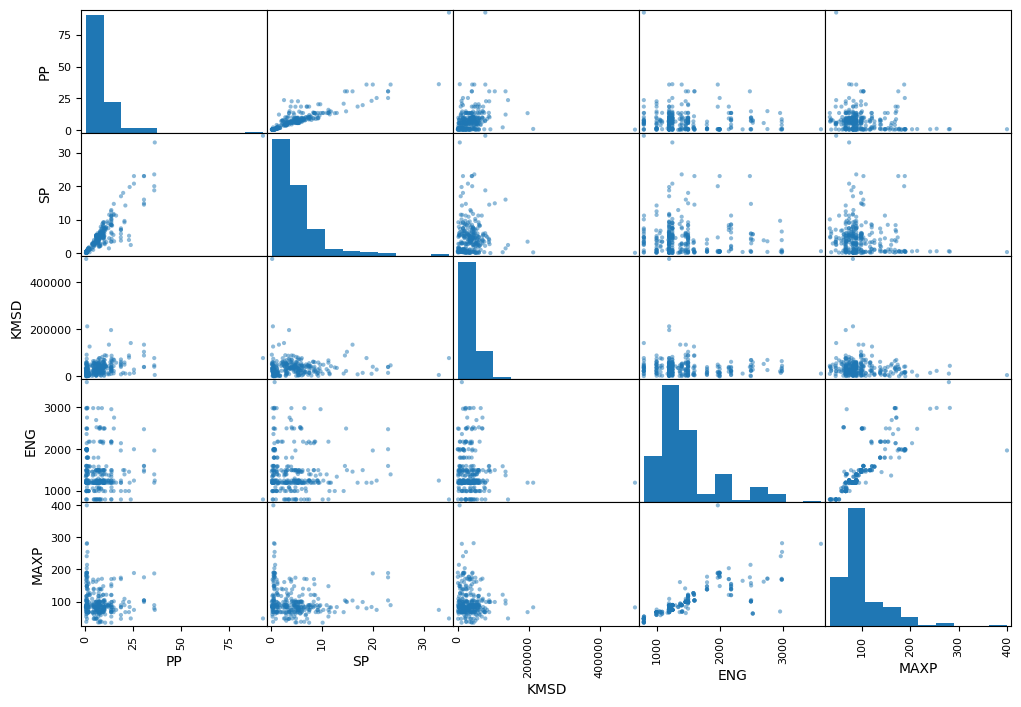

In [7]:
from pandas.plotting import scatter_matrix
attributes = ["PP", "SP","KMSD" ,"ENG","MAXP" ]
scatter_matrix(cardata[attributes], figsize = (12,8))

# Splitting the Data into Training and Testing Set

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(cardata, test_size=0.2, random_state=42)

In [9]:
cardata = train_set.drop("SP", axis = 1) #feature variable columns
cardata_labels = train_set["SP"].copy() #predictor variale column

In [10]:
cardata.columns

Index(['CN', 'YRS', 'PP', 'KMSD', 'FT', 'ST', 'TRM', 'OWN', 'MIL', 'ENG',
       'MAXP', 'SEAT', 'CY', 'NOYRS'],
      dtype='object')

In [11]:
cardatafinal = cardata[[ 'PP', 'KMSD', 'OWN', 'MIL', 'ENG',
       'MAXP', 'SEAT', 'NOYRS']]
cardatafinal.head()

,PP,KMSD,OWN,MIL,ENG,MAXP,SEAT,NOYRS
184,0.750,26000,1,13.00,1493.0,100.00,5,14
132,0.950,3500,0,22.37,2487.0,214.56,5,5
194,0.787,50000,0,20.85,1197.0,83.14,5,14
75,6.800,36000,0,12.55,2982.0,168.50,7,7
111,1.500,8700,0,19.09,1405.0,69.01,5,6


In [12]:
test_set_final = test_set[['SP', 'PP', 'KMSD', 'OWN', 'MIL', 'ENG',
       'MAXP', 'SEAT', 'NOYRS']]
test_set_final.head()

,SP,PP,KMSD,OWN,MIL,ENG,MAXP,SEAT,NOYRS
177,0.35,0.57,24000,0,16.100,796.000,37.000,4,6
289,10.11,13.60,10980,0,16.800,796.000,34.200,8,6
228,4.95,9.40,60000,0,19.218,1458.838,98.803,5,10
198,0.15,0.57,35000,1,20.300,1199.000,84.000,5,11
60,6.95,18.61,40001,0,14.840,2143.000,170.000,5,9


# Scaling the data and Creating Pipeline

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
       ('sta_scaler', StandardScaler())
])

In [14]:
cardata_tr = my_pipeline.fit_transform(cardatafinal)

# Selecting a desired ML Model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
#model = GradientBoostingRegressor()
model.fit(cardatafinal, cardata_labels)

LinearRegression()

In [16]:
from sklearn.metrics import mean_squared_error
model_predictions = model.predict(cardatafinal)
mse = mean_squared_error(cardata_labels, model_predictions)
rmse = mse**(0.5)
print(rmse)

1.922616369616009


1. Linear RMSE = 1.922616369616009
2. Decision Tree RMSE = 3.103167691559091e-18
3. Random Forest Regressor RMSE = 0.7550093217139772
4. Gradient Boosting Regressor RMSE = 0.3119487598128941
5. AdaBoost Tegressor RMSE = 0.9040293240082928

A realistic least RMSE and suitable fit would be Gradient Boosting Regressor.

# Using Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, cardatafinal, cardata_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = (-scores)**(0.5)
def print_scores(scores):
    print("Scores are: ", scores)
    print("Means are:" , scores.mean())
    print("Standard Deviation are:", scores.std())
    
#Calling the print scores of cross validated result functions

print_scores(rmse_scores)

Scores are:  [2.327525   1.78529573 4.22642112 1.38286429 2.43202755 1.08070905
 2.95596894 1.74799512 2.02470747 1.08129404]
Means are: 2.1044808303735003
Standard Deviation are: 0.9075116206205516


# Saving the Model

In [18]:
from joblib import dump, load
dump (model, 'Carcost_Predictor.joblib')

['Carcost_Predictor.joblib']

# Testing Model on a Test Set

In [19]:
x_test = test_set_final.drop("SP", axis = 1 )
y_test = test_set_final["SP"].copy()
x_test_prepared = my_pipeline.transform(x_test) #imputing and standardizing the values
final_predictions = model.predict(x_test_prepared)
test_mse = mean_squared_error(y_test, final_predictions)
test_rmse = (test_mse)**(0.5)
print("The Tested Data RMSE is: ",test_rmse)

The Tested Data RMSE is:  4.466918919504508


C:\Users\MAHE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
print("Finally Predicted Values:", final_predictions)

Finally Predicted Values: [ 3.494538    4.45971375  3.48727386 -1.26492272  4.10511811  3.90889476
  3.48969461  3.25926945  3.58471006  3.80664372  4.39593947  3.22967705
  3.97625278  3.72174723  3.60878477  3.42440656  3.09178618  4.74189252
  3.65675363  3.7813946   3.06459401  4.05793375  3.456442    3.11327435
  3.24877332  3.33835018  3.65767672  3.14547471  3.73841823  3.5652378
  3.15795955  4.03964055  2.7416979   2.76117753  4.18428703  3.71992705
  3.97059598  3.64445304  3.36122029  3.68947827  2.72339705  2.57118919
  3.60747939  3.26473828  3.80619222  3.11196134  4.00364049  3.959894
  3.40196238  3.31845327  3.64384713  3.78628327  5.45448631  5.07727597
  3.97165963  4.34010686  3.80372025  4.19084284  2.51521619  4.05127387
  3.13217236]


In [21]:
print("Actual Values: ", list(y_test))

Actual Values:  [0.35, 10.11, 4.95, 0.15, 6.95, 7.45, 1.1, 0.5, 0.45, 6.0, 9.25, 1.1, 7.5, 0.4, 6.15, 2.65, 0.95, 17.0, 0.48, 1.7, 0.42, 8.35, 5.35, 3.0, 0.6, 3.75, 5.0, 2.65, 1.2, 1.2, 0.65, 8.25, 0.45, 1.95, 7.75, 3.65, 5.5, 3.8, 2.9, 4.75, 3.51, 1.5, 4.5, 0.42, 6.5, 0.6, 6.25, 5.25, 4.0, 3.1, 5.11, 1.35, 23.5, 23.0, 8.25, 10.9, 5.5, 9.5, 2.1, 7.4, 0.3]
